In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

In [6]:
df = pd.read_csv('regression_dataset.csv')
df.head()

,date,qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   qty     365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


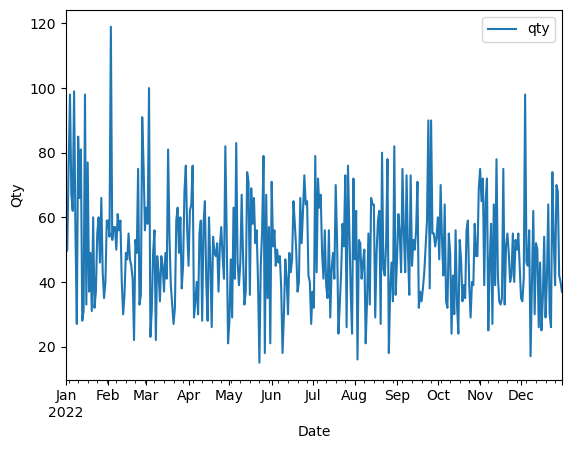

In [14]:

#melihat plot data

df.plot()
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [15]:
df.describe()

,qty
count,365.000000
mean,49.657534
std,16.730918
min,15.000000
25%,37.000000
50%,49.000000
75%,59.000000
max,119.000000


In [85]:
#Transform data to log
df = np.log(df)
df.head(3)

C:\Users\SUKMA\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\SUKMA\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,qty,qty First Difference,Seasonal First Difference,forecast
date,,,,
2022-01-01,3.891820,NaN,NaN,NaN
2022-01-02,3.912023,0.000000,NaN,NaN
2022-01-03,4.330733,3.258097,NaN,NaN


In [18]:
#Cek Stasionary
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['qty'])

In [23]:
#Ho: data tidak stasioner
#H1: data stasioner

def adfuller_test(qty):
    result=adfuller(qty)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Data tidak stasioner, maka HO di terima")
    else:
        print("Data stasioner, maka H1 diterima ")
    

In [24]:
adfuller_test(df['qty'])

ADF Test Statistic : -19.091513872408132
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 364
Data tidak stasioner, maka HO di terima


In [22]:
df['qty First Difference'] = df['qty'] - df['qty'].shift(1)

df['qty'].shift(1)

date
2022-01-01     NaN
2022-01-02    49.0
2022-01-03    50.0
2022-01-04    76.0
2022-01-05    98.0
              ... 
2022-12-27    39.0
2022-12-28    70.0
2022-12-29    68.0
2022-12-30    42.0
2022-12-31    40.0
Name: qty, Length: 365, dtype: float64

In [26]:
df['Seasonal First Difference']=df['qty']-df['qty'].shift(12)

In [27]:
df.head(14)

,qty,qty First Difference,Seasonal First Difference
date,,,
2022-01-01,49,NaN,NaN
2022-01-02,50,1.0,NaN
2022-01-03,76,26.0,NaN
2022-01-04,98,22.0,NaN
2022-01-05,67,-31.0,NaN
2022-01-06,62,-5.0,NaN
2022-01-07,99,37.0,NaN
2022-01-08,56,-43.0,NaN
2022-01-09,27,-29.0,NaN


In [28]:
#melakukan dickey fuller test ulang

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.439012743546206
p-value : 1.5393682934612244e-18
#Lags Used : 11
Number of Observations Used : 341
Data tidak stasioner, maka HO di terima


<AxesSubplot:xlabel='date'>

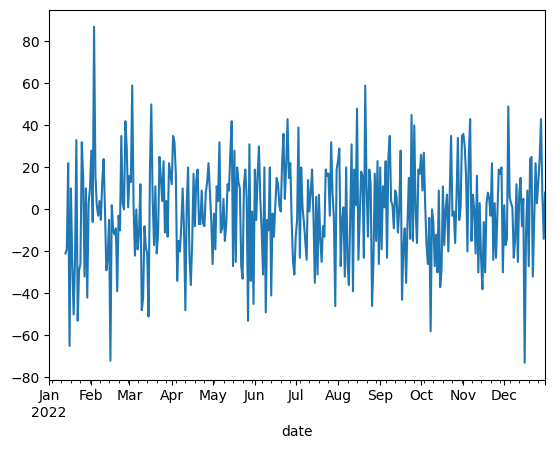

In [29]:
df['Seasonal First Difference'].plot()

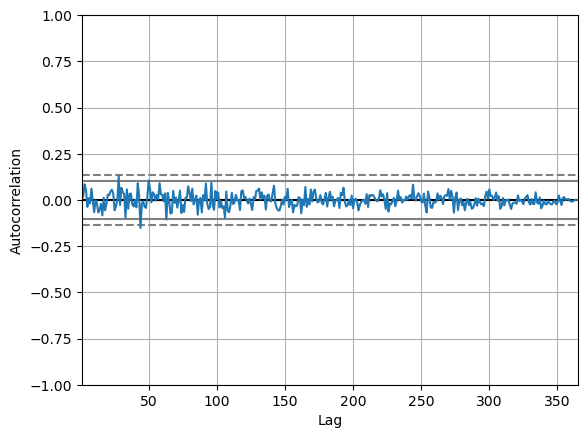

In [33]:
#autokorelasi model

from pandas.plotting import autocorrelation_plot


autocorrelation_plot(df['qty'])
plt.show()

In [82]:
#Split train and test
df_train = df.iloc[:-31]
df_test = df.iloc[-31:]

ValueError: x is required to have ndim 1 but has ndim 2

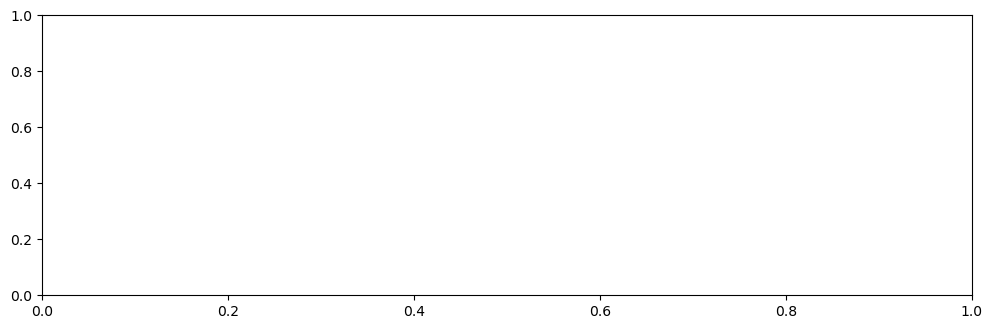

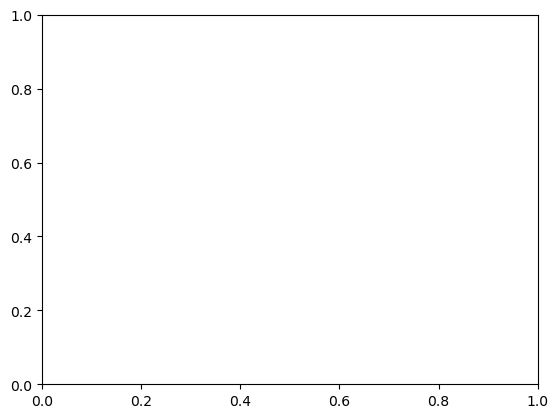

In [84]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_train)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_train)

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
model=ARIMA(df['qty'],order=(1,1,1))
model_fit=model.fit()

C:\Users\SUKMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SUKMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SUKMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [64]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    qty   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1544.122
Date:                Wed, 26 Jul 2023   AIC                           3094.245
Time:                        21:07:03   BIC                           3105.936
Sample:                    01-01-2022   HQIC                          3098.892
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0150      0.054     -0.277      0.782      -0.121       0.091
ma.L1         -0.9839      0.014    -69.359      0.000      -1.012      -0.956
sigma2       280.6688     20.960     13.391      0.000     239.588     321.750
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                11.87
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.42
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

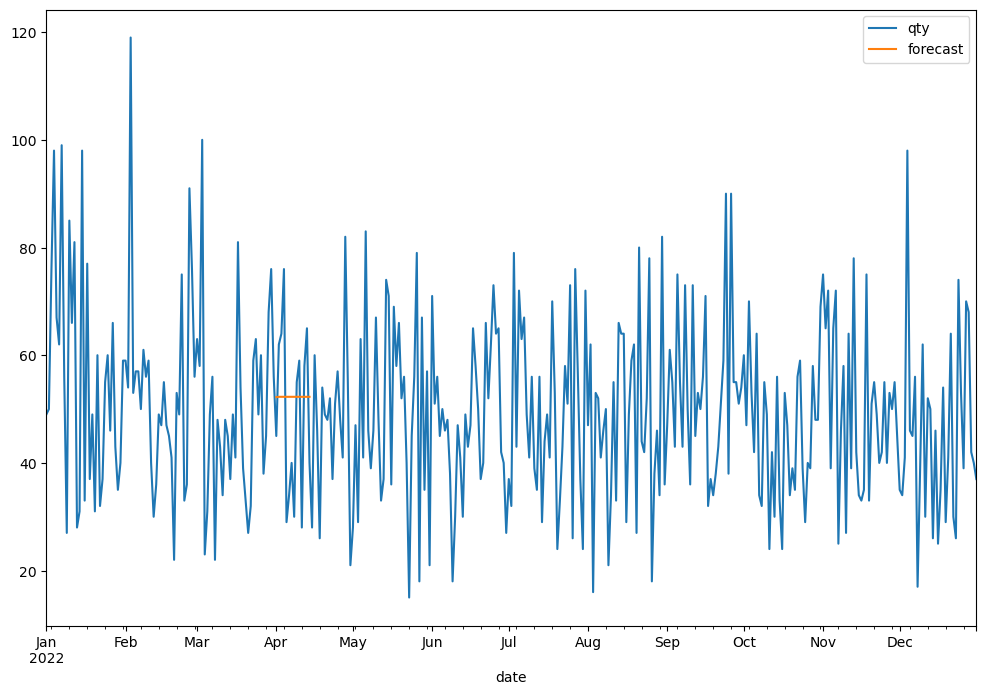

In [77]:
df['forecast']=model_fit.predict(start='2022-01-01',end='2022-12-31',dynamic=True)
df[['qty','forecast']].plot(figsize=(12,8))

In [54]:
import statsmodels.api as sm

In [55]:
model=sm.tsa.statespace.SARIMAX(df['qty'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\SUKMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SUKMA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

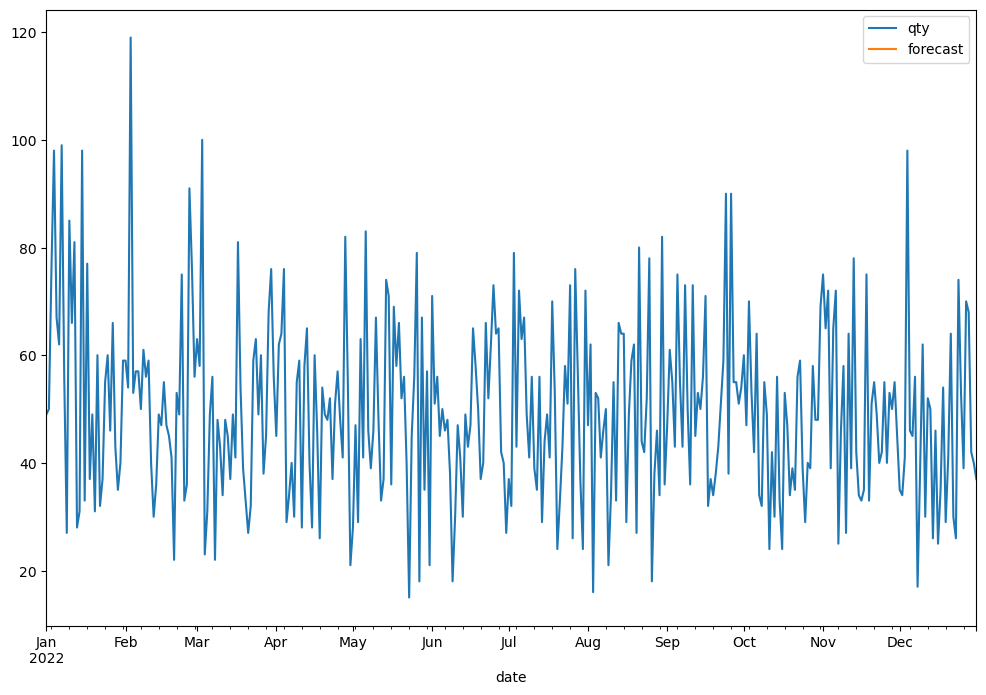

In [80]:
df['forecast']=results.predict(start='2023-01-01', end='2023-03-27', dynamic=True)
df[['qty','forecast']].plot(figsize=(12,8))

In [57]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [58]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [59]:

future_datest_df.tail()

,qty,qty First Difference,Seasonal First Difference,forecast
2024-07-31,NaN,NaN,NaN,NaN
2024-08-31,NaN,NaN,NaN,NaN
2024-09-30,NaN,NaN,NaN,NaN
2024-10-31,NaN,NaN,NaN,NaN
2024-11-30,NaN,NaN,NaN,NaN


In [60]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

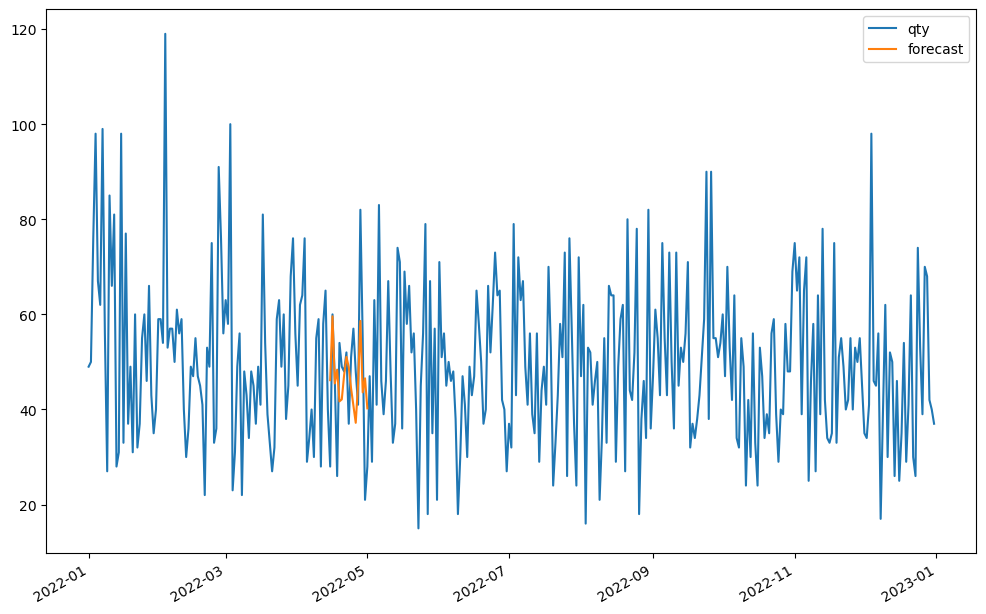

In [61]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['qty', 'forecast']].plot(figsize=(12, 8)) 